In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [2]:
import os
import numpy as np
import pandas as pd

In [3]:
#load model
import pickle
os.chdir('/media/tohn/SSD/ModelTrainByImages/R2_1/models/')
filename = "modelrf_EffNet5_b5_1FC_cross_15AB_15AB.pkl"
with open(filename, 'rb') as file:
    model = pickle.load(file)

/home/yupaporn/miniconda3/envs/USAI3/lib/python3.6/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.23.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/yupaporn/miniconda3/envs/USAI3/lib/python3.6/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.23.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [4]:
dataframe = pd.read_csv('/home/yupaporn/codes/result_model/FVtest_RF_15AB_1FC_3.csv')

In [5]:
dataframe

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,2042,2043,2044,2045,2046,2047,Class,SubPosition,Views,Sub_class
0,0,-0.107834,0.312153,0.017337,-0.183516,0.575317,-0.173991,-0.089335,-0.063324,-0.030139,...,0.138473,-0.108649,0.148072,0.400463,0.140204,0.374979,Abnormal,P1,FP-A,AB01
1,1,0.410596,0.660919,-0.136564,-0.185140,0.411923,-0.167171,0.004935,0.000345,-0.130163,...,0.396031,-0.173826,-0.012627,0.236496,0.633178,0.092445,Abnormal,P2,FP-A,AB01
2,2,-0.017506,0.345108,0.225856,-0.165460,0.779618,-0.193235,-0.032824,-0.147712,-0.096544,...,0.282353,-0.138690,-0.005355,0.241840,0.390013,-0.130200,Abnormal,P41,FP-B,AB01
3,3,-0.020903,0.117675,-0.082832,-0.135977,0.282651,-0.220009,0.111933,-0.094878,-0.103359,...,0.298243,-0.055977,0.022169,0.057336,0.233832,-0.014271,Abnormal,P51,FP-C,AB01
4,4,0.064263,0.339077,0.294470,-0.157962,0.194468,-0.202357,-0.088951,-0.190239,-0.139355,...,0.215621,0.174917,-0.076772,0.139161,0.083017,-0.109640,Abnormal,P31,FP-B,AB01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,1307,0.744560,1.183851,-0.053521,-0.201383,0.486395,-0.161736,0.369923,0.262435,0.401869,...,-0.007029,-0.143082,0.694543,0.309269,0.582698,0.681160,Normal,P32,FP-B,Normal
1308,1308,0.002655,-0.022163,-0.106891,-0.050454,0.119425,0.226082,-0.119361,0.402494,0.157569,...,-0.033625,0.049808,0.067248,0.423208,-0.147667,0.224346,Normal,P42,FP-B,Normal
1309,1309,0.311473,0.809877,-0.182767,-0.104543,0.685962,0.047534,0.061280,0.351369,0.239477,...,0.758374,0.121146,0.329733,1.196532,0.142886,0.753334,Normal,P52,FP-C,Normal
1310,1310,0.273309,-0.022789,0.022111,-0.126591,-0.079215,-0.175265,0.018625,-0.036004,0.046267,...,0.102547,-0.169974,0.069229,0.219710,-0.151904,0.272406,Normal,P61,FP-C,Normal


In [6]:
train_df = pd.read_csv( '/home/yupaporn/codes/USAI/Traindf.csv')#แก้
conf_mat = pd.crosstab(train_df['Views'],train_df['Sub_class'],rownames=['5-FP Class'],colnames=['15AB Class'])
conf_mat

15AB Class,AB01,AB02,AB03,AB04,AB05,AB06,AB07,AB081,AB082,AB083,AB09,AB10,AB11,AB12,Normal
5-FP Class,,,,,,,,,,,,,,,
FP-A,84,109,42,84,34,59,2,22,21,8,0,0,0,0,596
FP-B,130,103,24,37,60,5,51,57,48,23,2,0,0,0,1063
FP-C,81,61,19,38,4,0,21,45,40,12,96,43,60,0,1015
FP-D,0,0,0,19,0,0,0,0,0,0,0,0,34,245,482
FP-E,0,0,0,0,0,0,0,0,0,0,0,0,0,0,278


In [7]:
FP_ = []
for j in range(5) :
    FP = list(conf_mat.iloc[j,:][0:14])
    max_ = 11
    fp = []
    if j == 4:
        fp = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,1,1]
        FP_.append(fp)
    else:
        for i in FP:
    #         fp = []
            if i >= max_:
                a =1
                fp.append(a)
            else:
                a =0
                fp.append(a)
        fp.append(1)
        FP_.append(fp)

In [26]:
FP=np.array(FP_)
FP.shape

(5, 15)

In [27]:
FP

array([[1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1],
       [1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1],
       [1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [28]:
df_ = pd.DataFrame(FP, columns = [ 'AB01','AB02','AB03', 'AB04', 'AB05', 'AB06', 'AB07', 'AB081', 'AB082', 'AB083', 'AB09', 'AB10', 'AB11', 'AB12', 'Normal'])
df_

,AB01,AB02,AB03,AB04,AB05,AB06,AB07,AB081,AB082,AB083,AB09,AB10,AB11,AB12,Normal
0,1,1,1,1,1,1,0,1,1,0,0,0,0,0,1
1,1,1,1,1,1,0,1,1,1,1,0,0,0,0,1
2,1,1,1,1,0,0,1,1,1,1,1,1,1,0,1
3,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [10]:
X_test = dataframe.iloc[:,1:2049]
y_test = dataframe.iloc[:,2052]
print(X_test.shape)
print(y_test.shape)

(1312, 2048)
(1312,)


In [11]:

labels = {0: 'AB01', 1: 'AB02', 2: 'AB03', 3: 'AB04', 4: 'AB05', 5: 'AB06', 6: 'AB07', 7: 'AB081', 8: 'AB082', 9: 'AB083', 10: 'AB09', 11: 'AB10', 12: 'AB11', 13: 'AB12', 14: 'Normal'}

In [12]:
#Predict
pred_list = list()
prob_list = list()
pred_list_ = list()
fp=dataframe['Views'].tolist()

In [13]:
y_prob = model.predict_proba(X_test)

In [14]:
result_ = []
for i in range(0,len(y_prob)):
    print(i)
    print(fp[i])
    if fp[i] =='FP-A':
        indx = 0
    elif fp[i] =='FP-B':
        indx = 1
    elif fp[i] =='FP-C':
        indx = 2
    elif fp[i] =='FP-D':
        indx = 3
    else :
        indx = 4
    result = y_prob[i]*FP[indx]
    result_.append(result)

0
FP-A
1
FP-A
2
FP-B
3
FP-C
4
FP-B
5
FP-A
6
FP-B
7
FP-A
8
FP-B
9
FP-A
10
FP-A
11
FP-B
12
FP-B
13
FP-A
14
FP-B
15
FP-C
16
FP-B
17
FP-A
18
FP-A
19
FP-B
20
FP-C
21
FP-D
22
FP-B
23
FP-C
24
FP-B
25
FP-C
26
FP-C
27
FP-C
28
FP-C
29
FP-A
30
FP-A
31
FP-B
32
FP-C
33
FP-B
34
FP-C
35
FP-B
36
FP-C
37
FP-A
38
FP-D
39
FP-A
40
FP-B
41
FP-A
42
FP-B
43
FP-C
44
FP-C
45
FP-B
46
FP-C
47
FP-C
48
FP-C
49
FP-C
50
FP-C
51
FP-C
52
FP-A
53
FP-B
54
FP-A
55
FP-A
56
FP-C
57
FP-B
58
FP-A
59
FP-A
60
FP-A
61
FP-A
62
FP-A
63
FP-B
64
FP-A
65
FP-C
66
FP-B
67
FP-C
68
FP-C
69
FP-B
70
FP-B
71
FP-C
72
FP-C
73
FP-C
74
FP-B
75
FP-C
76
FP-A
77
FP-B
78
FP-A
79
FP-B
80
FP-B
81
FP-C
82
FP-A
83
FP-B
84
FP-A
85
FP-B
86
FP-A
87
FP-A
88
FP-C
89
FP-B
90
FP-B
91
FP-A
92
FP-B
93
FP-C
94
FP-C
95
FP-C
96
FP-A
97
FP-C
98
FP-C
99
FP-B
100
FP-C
101
FP-B
102
FP-A
103
FP-A
104
FP-A
105
FP-A
106
FP-B
107
FP-C
108
FP-A
109
FP-B
110
FP-C
111
FP-C
112
FP-B
113
FP-A
114
FP-A
115
FP-B
116
FP-C
117
FP-B
118
FP-A
119
FP-B
120
FP-C
121
FP-A
122
FP-A
123

1200
FP-C
1201
FP-C
1202
FP-C
1203
FP-C
1204
FP-D
1205
FP-D
1206
FP-E
1207
FP-A
1208
FP-A
1209
FP-B
1210
FP-B
1211
FP-B
1212
FP-B
1213
FP-C
1214
FP-C
1215
FP-C
1216
FP-C
1217
FP-C
1218
FP-D
1219
FP-E
1220
FP-A
1221
FP-A
1222
FP-B
1223
FP-B
1224
FP-B
1225
FP-B
1226
FP-C
1227
FP-C
1228
FP-C
1229
FP-C
1230
FP-C
1231
FP-D
1232
FP-E
1233
FP-A
1234
FP-A
1235
FP-B
1236
FP-B
1237
FP-B
1238
FP-B
1239
FP-C
1240
FP-C
1241
FP-C
1242
FP-C
1243
FP-C
1244
FP-D
1245
FP-D
1246
FP-E
1247
FP-A
1248
FP-A
1249
FP-B
1250
FP-B
1251
FP-B
1252
FP-B
1253
FP-C
1254
FP-C
1255
FP-C
1256
FP-C
1257
FP-C
1258
FP-D
1259
FP-D
1260
FP-E
1261
FP-A
1262
FP-A
1263
FP-B
1264
FP-B
1265
FP-B
1266
FP-B
1267
FP-C
1268
FP-C
1269
FP-C
1270
FP-C
1271
FP-C
1272
FP-D
1273
FP-D
1274
FP-E
1275
FP-A
1276
FP-A
1277
FP-A
1278
FP-B
1279
FP-B
1280
FP-B
1281
FP-B
1282
FP-C
1283
FP-C
1284
FP-C
1285
FP-C
1286
FP-C
1287
FP-D
1288
FP-D
1289
FP-E
1290
FP-A
1291
FP-A
1292
FP-B
1293
FP-B
1294
FP-B
1295
FP-C
1296
FP-C
1297
FP-E
1298
FP-A
1299
FP-B


In [15]:
FP[-1]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [16]:
y_prob[-1]

array([5.08009153e-03, 1.71624714e-05, 6.23569794e-04, 1.71624714e-05,
       9.41780822e-05, 3.14057553e-05, 0.00000000e+00, 3.60116062e-03,
       1.71624714e-05, 4.80157362e-04, 2.05483370e-03, 0.00000000e+00,
       0.00000000e+00, 1.14416476e-05, 9.87971674e-01])

In [17]:
y_prob[-1]*FP[-1]

array([5.08009153e-03, 1.71624714e-05, 6.23569794e-04, 1.71624714e-05,
       9.41780822e-05, 3.14057553e-05, 0.00000000e+00, 3.60116062e-03,
       1.71624714e-05, 4.80157362e-04, 2.05483370e-03, 0.00000000e+00,
       0.00000000e+00, 1.14416476e-05, 9.87971674e-01])

In [18]:
result_[-1]

array([5.08009153e-03, 1.71624714e-05, 6.23569794e-04, 1.71624714e-05,
       9.41780822e-05, 3.14057553e-05, 0.00000000e+00, 3.60116062e-03,
       1.71624714e-05, 4.80157362e-04, 2.05483370e-03, 0.00000000e+00,
       0.00000000e+00, 1.14416476e-05, 9.87971674e-01])

In [19]:
pred_list = list()
prob_list = list()

for i in range(0,len(result_)):
    result = result_[i]
    re_class = list()
    re_prop = list()  
    maxx = np.argmax(result)
    re_class=labels[maxx]
    re_prop = result[14]
    pred_list.append(re_class)
    prob_list.append(re_prop)

In [20]:
dataframe['category'] = pred_list
dataframe['Prob'] = prob_list

In [21]:
dataframe

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,2044,2045,2046,2047,Class,SubPosition,Views,Sub_class,category,Prob
0,0,-0.107834,0.312153,0.017337,-0.183516,0.575317,-0.173991,-0.089335,-0.063324,-0.030139,...,0.148072,0.400463,0.140204,0.374979,Abnormal,P1,FP-A,AB01,Normal,0.413035
1,1,0.410596,0.660919,-0.136564,-0.185140,0.411923,-0.167171,0.004935,0.000345,-0.130163,...,-0.012627,0.236496,0.633178,0.092445,Abnormal,P2,FP-A,AB01,AB01,0.110668
2,2,-0.017506,0.345108,0.225856,-0.165460,0.779618,-0.193235,-0.032824,-0.147712,-0.096544,...,-0.005355,0.241840,0.390013,-0.130200,Abnormal,P41,FP-B,AB01,AB02,0.091490
3,3,-0.020903,0.117675,-0.082832,-0.135977,0.282651,-0.220009,0.111933,-0.094878,-0.103359,...,0.022169,0.057336,0.233832,-0.014271,Abnormal,P51,FP-C,AB01,AB01,0.075286
4,4,0.064263,0.339077,0.294470,-0.157962,0.194468,-0.202357,-0.088951,-0.190239,-0.139355,...,-0.076772,0.139161,0.083017,-0.109640,Abnormal,P31,FP-B,AB01,AB02,0.065060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,1307,0.744560,1.183851,-0.053521,-0.201383,0.486395,-0.161736,0.369923,0.262435,0.401869,...,0.694543,0.309269,0.582698,0.681160,Normal,P32,FP-B,Normal,Normal,1.000000
1308,1308,0.002655,-0.022163,-0.106891,-0.050454,0.119425,0.226082,-0.119361,0.402494,0.157569,...,0.067248,0.423208,-0.147667,0.224346,Normal,P42,FP-B,Normal,Normal,0.515819
1309,1309,0.311473,0.809877,-0.182767,-0.104543,0.685962,0.047534,0.061280,0.351369,0.239477,...,0.329733,1.196532,0.142886,0.753334,Normal,P52,FP-C,Normal,Normal,0.995000
1310,1310,0.273309,-0.022789,0.022111,-0.126591,-0.079215,-0.175265,0.018625,-0.036004,0.046267,...,0.069229,0.219710,-0.151904,0.272406,Normal,P61,FP-C,Normal,Normal,0.906968


In [22]:
p1 = dataframe
act= p1['Sub_class'].tolist()
pred = p1['category'].tolist()
#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
# confusion_matrix(act, pred)
print(classification_report(act, pred))#performance

              precision    recall  f1-score   support

        AB01       0.78      0.61      0.68        74
        AB02       0.59      0.60      0.60        60
        AB03       0.47      0.50      0.49        18
        AB04       0.88      0.65      0.75        43
        AB05       0.79      0.66      0.72        29
        AB06       0.92      0.52      0.67        21
        AB07       0.79      0.52      0.63        21
       AB081       0.76      0.59      0.67        32
       AB082       0.80      0.57      0.67        28
       AB083       1.00      0.27      0.43        11
        AB09       1.00      0.81      0.89        26
        AB10       1.00      0.40      0.57        10
        AB11       0.91      0.91      0.91        23
        AB12       0.98      0.85      0.91        59
      Normal       0.90      1.00      0.95       857

    accuracy                           0.87      1312
   macro avg       0.84      0.63      0.70      1312
weighted avg       0.87   

Text(0.5, 21.5, 'Predicted label')

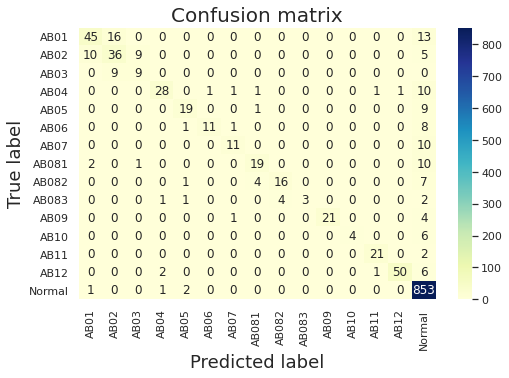

In [23]:
#create CF 
data = {'Actual': act,'Predicted' : pred,}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act, pred)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

In [24]:
act= p1['Sub_class'].map({'AB12':1, 'AB04':1, 'AB05':1, 'Normal':0, 'AB02':1, 'AB11':1, 'AB082':1, 'AB06':1,'AB07':1, 'AB081':1, 'AB09':1, 'AB03':1, 'AB10':1, 'AB01':1, 'AB083':1}).values
pred = p1['category'].map({'AB12':1, 'AB04':1, 'AB05':1, 'Normal':0, 'AB02':1, 'AB11':1, 'AB082':1, 'AB06':1,'AB07':1, 'AB081':1, 'AB09':1, 'AB03':1, 'AB10':1, 'AB01':1, 'AB083':1}).values
cmat = confusion_matrix(act, pred)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act, pred))#performance

classifier accuracy = 92.6829268292683%
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       857
           1       0.99      0.80      0.88       455

    accuracy                           0.93      1312
   macro avg       0.95      0.90      0.91      1312
weighted avg       0.93      0.93      0.92      1312



853 4 92 363


Text(48.5, 0.5, 'True label')

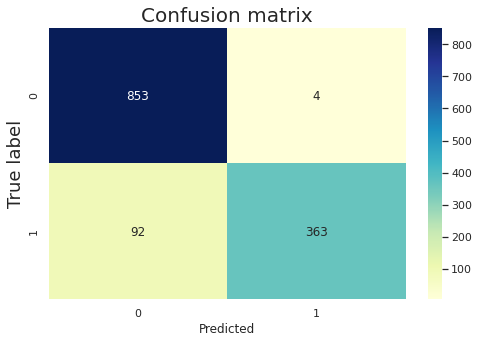

In [25]:
#create CF 
data = {'Actual': act,'Predicted' : pred,}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act, pred)
TN, FP, FN, TP = confusion_matrix(act, pred).ravel()
print(TN, FP, FN, TP)
#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)

# Top-3